<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/Multilinear_RegresAssign2Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df2=pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')


In [3]:
df2

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [4]:
df2.drop(["Id"],inplace=True,axis=1)

In [5]:
df2.info() #columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [6]:
import seaborn as sns
import statsmodels.formula.api as smf
df2.isna().sum()  # checking for missing values

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64


**Correlation Matrix**

Check for Assumption: Independent variables are independent of each other

In [7]:
df2.corr()

<ipython-input-7-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


Price  Age_08_04  Mfg_Month  Mfg_Year        KM  \
Price             1.000000  -0.876590  -0.018138  0.885159 -0.569960   
Age_08_04        -0.876590   1.000000  -0.123255 -0.983661  0.505672   
Mfg_Month        -0.018138  -0.123255   1.000000 -0.057416 -0.020630   
Mfg_Year          0.885159  -0.983661  -0.057416  1.000000 -0.504974   
KM               -0.569960   0.505672  -0.020630 -0.504974  1.000000   
HP                0.314990  -0.156622  -0.039312  0.164697 -0.333538   
Met_Color         0.108905  -0.108150   0.030266  0.103310 -0.080503   
Automatic         0.033081   0.031717   0.009146 -0.033567 -0.081854   
cc                0.126389  -0.098084   0.037387  0.091892  0.102683   
Doors             0.185326  -0.148359  -0.012069  0.151442 -0.036197   
Cylinders              NaN        NaN        NaN       NaN       NaN   
Gears             0.063104  -0.005364  -0.013063  0.007766  0.015023   
Quarterly_Tax     0.219197  -0.198431   0.031373  0.193934  0.278165   
Weight            0.581198  -0.470253  -0.002167  0.473478 -0.028598   
Mfr_Guarantee     0.197802  -0.164658  -0.005771  0.166697 -0.212851   
BOVAG_Guarantee   0.028133   0.006865  -0.003863 -0.006206  0.001438   
Guarantee_Period  0.146627  -0.152563   0.029010  0.148218 -0.138942   
ABS               0.306138  -0.412887   0.072532  0.402215 -0.177203   
Airbag_1          0.093588  -0.105406   0.003756  0.105359 -0.018012   
Airbag_2          0.248974  -0.329017   0.076749  0.317075 -0.139275   
Airco             0.429259  -0.403600   0.057088  0.395674 -0.133057   
Automatic_airco   0.588262  -0.426259  -0.049017  0.437718 -0.258221   
Boardcomputer     0.601292  -0.719449   0.017715  0.720567 -0.353862   
CD_Player         0.481374  -0.510895  -0.016736  0.517008 -0.266826   
Central_Lock      0.343458  -0.279631   0.010055  0.279490 -0.125177   
Powered_Windows   0.356518  -0.283856   0.025185  0.280996 -0.156242   
Power_Steering    0.064275  -0.069192  -0.055495  0.079676  0.007397   
Radio            -0.041887   0.013791   0.031601 -0.019607  0.013661   
Mistlamps         0.222083  -0.126895  -0.033504  0.133737 -0.074327   
Sport_Model       0.164121  -0.110988   0.052789  0.102080 -0.044784   
Backseat_Divider  0.102569  -0.116751   0.023245  0.113237 -0.045658   
Metallic_Rim      0.108564  -0.040045   0.023506  0.036022 -0.013599   
Radio_cassette   -0.043179   0.012857   0.032576 -0.018844  0.015770   
Tow_Bar          -0.172369   0.188720  -0.042170 -0.182206  0.084153   

                        HP  Met_Color  Automatic        cc     Doors  ...  \
Price             0.314990   0.108905   0.033081  0.126389  0.185326  ...   
Age_08_04        -0.156622  -0.108150   0.031717 -0.098084 -0.148359  ...   
Mfg_Month        -0.039312   0.030266   0.009146  0.037387 -0.012069  ...   
Mfg_Year          0.164697   0.103310  -0.033567  0.091892  0.151442  ...   
KM               -0.333538  -0.080503  -0.081854  0.102683 -0.036197  ...   
HP                1.000000   0.058712   0.013144  0.035856  0.092424  ...   
Met_Color         0.058712   1.000000  -0.019335  0.031812  0.085243  ...   
Automatic         0.013144  -0.019335   1.000000  0.066740 -0.027654  ...   
cc                0.035856   0.031812   0.066740  1.000000  0.079903  ...   
Doors             0.092424   0.085243  -0.027654  0.079903  1.000000  ...   
Cylinders              NaN        NaN        NaN       NaN       NaN  ...   
Gears             0.209477   0.018601  -0.098555  0.014629 -0.160141  ...   
Quarterly_Tax    -0.298432   0.011326  -0.055371  0.306996  0.109363  ...   
Weight            0.089614   0.057929   0.057249  0.335637  0.302618  ...   
Mfr_Guarantee     0.140026   0.154850   0.026194 -0.057407  0.037689  ...   
BOVAG_Guarantee   0.022701   0.010783   0.023393 -0.081725 -0.014311  ...   
Guarantee_Period  0.076163   0.009295  -0.002256 -0.017683  0.053654  ...   
ABS               0.057832   0.022298  -0.016128  0.037806  0.063733  ...   
Airbag_1          0.025137   0.100055

**Scatterplot between variables along with histograms**

Check for Assumption: Independent variables are independent of each other

In [8]:
#Format the plot background and scatter plots for all the variables
sns.set_style()
sns.pairplot(df2)

In [9]:
df2.describe()


Price    Age_08_04    Mfg_Month     Mfg_Year             KM  \
count   1436.000000  1436.000000  1436.000000  1436.000000    1436.000000   
mean   10730.824513    55.947075     5.548747  1999.625348   68533.259749   
std     3626.964585    18.599988     3.354085     1.540722   37506.448872   
min     4350.000000     1.000000     1.000000  1998.000000       1.000000   
25%     8450.000000    44.000000     3.000000  1998.000000   43000.000000   
50%     9900.000000    61.000000     5.000000  1999.000000   63389.500000   
75%    11950.000000    70.000000     8.000000  2001.000000   87020.750000   
max    32500.000000    80.000000    12.000000  2004.000000  243000.000000   

                HP    Met_Color    Automatic           cc        Doors  ...  \
count  1436.000000  1436.000000  1436.000000   1436.00000  1436.000000  ...   
mean    101.502089     0.674791     0.055710   1576.85585     4.033426  ...   
std      14.981080     0.468616     0.229441    424.38677     0.952677  ...   
min      69.000000     0.000000     0.000000   1300.00000     2.000000  ...   
25%      90.000000     0.000000     0.000000   1400.00000     3.000000  ...   
50%     110.000000     1.000000     0.000000   1600.00000     4.000000  ...   
75%     110.000000     1.000000     0.000000   1600.00000     5.000000  ...   
max     192.000000     1.000000     1.000000  16000.00000     5.000000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 34 columns]

In [10]:
df2[df2.duplicated()]

Empty DataFrame
Columns: [Model, Price, Age_08_04, Mfg_Month, Mfg_Year, KM, Fuel_Type, HP, Met_Color, Color, Automatic, cc, Doors, Cylinders, Gears, Quarterly_Tax, Weight, Mfr_Guarantee, BOVAG_Guarantee, Guarantee_Period, ABS, Airbag_1, Airbag_2, Airco, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows, Power_Steering, Radio, Mistlamps, Sport_Model, Backseat_Divider, Metallic_Rim, Radio_cassette, Tow_Bar]
Index: []

[0 rows x 37 columns]

# **Preparing a model**

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
Model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df2).fit()

In [12]:
Model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [13]:
# Finding tvalues and pvalues
Model.tvalues , np.round(Model.pvalues,5)

(Intercept        -3.948666
 Age_08_04       -46.511852
 KM              -16.621622
 HP               11.241018
 cc               -1.344222
 Doors            -0.040410
 Gears             3.016007
 Quarterly_Tax     3.014535
 Weight           15.879803
 dtype: float64,
 Intercept        0.00008
 Age_08_04        0.00000
 KM               0.00000
 HP               0.00000
 cc               0.17909
 Doors            0.96777
 Gears            0.00261
 Quarterly_Tax    0.00262
 Weight           0.00000
 dtype: float64)

In [67]:
# Finding rsquared values
Model.rsquared , Model.rsquared_adj ,Model.aic ##R squared value tells us how good model is.Model acuracy is 86%.

(0.8637627463428191, 0.8629989775766962, 24769.07664007625)

In [15]:
# Build SLR and MLR models for insignificant variables "Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight
# Also find their tvalues and pvalues
slr_a=smf.ols("Price~Age_08_04",data=df2).fit()
slr_a.tvalues , slr_a.pvalues  # Age has significant pvalue

(Intercept    138.907847
 Age_08_04    -68.978267
 dtype: float64,
 Intercept    0.0
 Age_08_04    0.0
 dtype: float64)

In [16]:
slr_k=smf.ols("Price~KM",data=df2).fit()
slr_k.tvalues , slr_k.pvalues  # KM has significant pvalue

(Intercept    88.510378
 KM          -26.267601
 dtype: float64,
 Intercept     0.000000e+00
 KM           1.757913e-124
 dtype: float64)

In [17]:
slr_hp=smf.ols("Price~HP",data=df2).fit()
slr_hp.tvalues , slr_hp.pvalues  # HP has significant pvalue

(Intercept     4.803134
 HP           12.567862
 dtype: float64,
 Intercept    1.725695e-06
 HP           1.926234e-34
 dtype: float64)

In [18]:
slr_cc=smf.ols("Price~cc",data=df2).fit()
slr_cc.tvalues , slr_cc.pvalues  # CC has significant pvalue

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [19]:
slr_d=smf.ols("Price~Doors",data=df2).fit()
slr_d.tvalues , slr_d.pvalues  # Doors has significant pvalue

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [20]:
slr_g=smf.ols("Price~Gears",data=df2).fit()
slr_g.tvalues , slr_g.pvalues  # Gears has significant pvalue

(Intercept    1.814534
 Gears        2.394401
 dtype: float64,
 Intercept    0.069804
 Gears        0.016775
 dtype: float64)

In [21]:
slr_hp=smf.ols("Price~Quarterly_Tax",data=df2).fit()
slr_hp.tvalues , slr_hp.pvalues  #  Quarterly_Tax has significant pvalue

(Intercept        41.330311
 Quarterly_Tax     8.507487
 dtype: float64,
 Intercept        1.532168e-246
 Quarterly_Tax     4.407393e-17
 dtype: float64)

In [22]:
slr_hp=smf.ols("Price~Weight",data=df2).fit()
slr_hp.tvalues , slr_hp.pvalues  #  Weight has significant pvalue

(Intercept   -20.263590
 Weight       27.045855
 dtype: float64,
 Intercept     1.739508e-80
 Weight       1.630487e-130
 dtype: float64)

# 1) Collinearity Problem Check Calculate VIF = 1/(1-Rsquare) for all independent variables

In [23]:
rsq_a=smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df2).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_k=smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df2).fit().rsquared
vif_k=1/(1-rsq_k)

rsq_hp=smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=df2).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=df2).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_d=smf.ols("Doors~Age_08_04+KM+cc+HP+Gears+Quarterly_Tax+Weight",data=df2).fit().rsquared
vif_d=1/(1-rsq_d)
rsq_g=smf.ols("Gears~Age_08_04+KM+cc+Doors+HP+Quarterly_Tax+Weight",data=df2).fit().rsquared
vif_g=1/(1-rsq_g)
rsq_q=smf.ols("Quarterly_Tax~Age_08_04+KM+cc+Doors+Gears+HP+Weight",data=df2).fit().rsquared
vif_q=1/(1-rsq_q)

rsq_w=smf.ols("Weight~Age_08_04+KM+cc+Doors+Gears+HP+Quarterly_Tax",data=df2).fit().rsquared
vif_w=1/(1-rsq_w)

In [24]:
# Putting the values in Dataframe format
d1={"Variables":['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
    "Vif":[vif_a,vif_k,vif_hp,vif_cc,vif_d,vif_g,vif_q,vif_w]}


In [25]:
Vif_df=pd.DataFrame(d1)
Vif_df

Variables       Vif
0      Age_08_04  1.884620
1             KM  1.756905
2             HP  1.419422
3             cc  1.163894
4          Doors  1.156575
5          Gears  1.098723
6  Quarterly_Tax  2.311431
7         Weight  2.516420

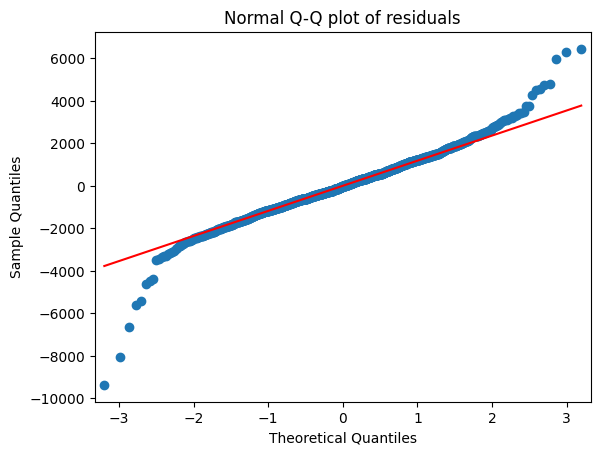

In [26]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(Model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
# to print index of values whose y value is less than 8000
list(np.where(Model.resid<-8000))

[array([221, 601])]

# Residual Plot for Homoscedasticity: Constant Variance

In [28]:
# Function definition for standardization i.e. z score, Function name: get_standardized_values
def get_stand_values( vals ):
    return (vals - vals.mean())/vals.std() # This is z score = (Xi - mean)/std. dev.

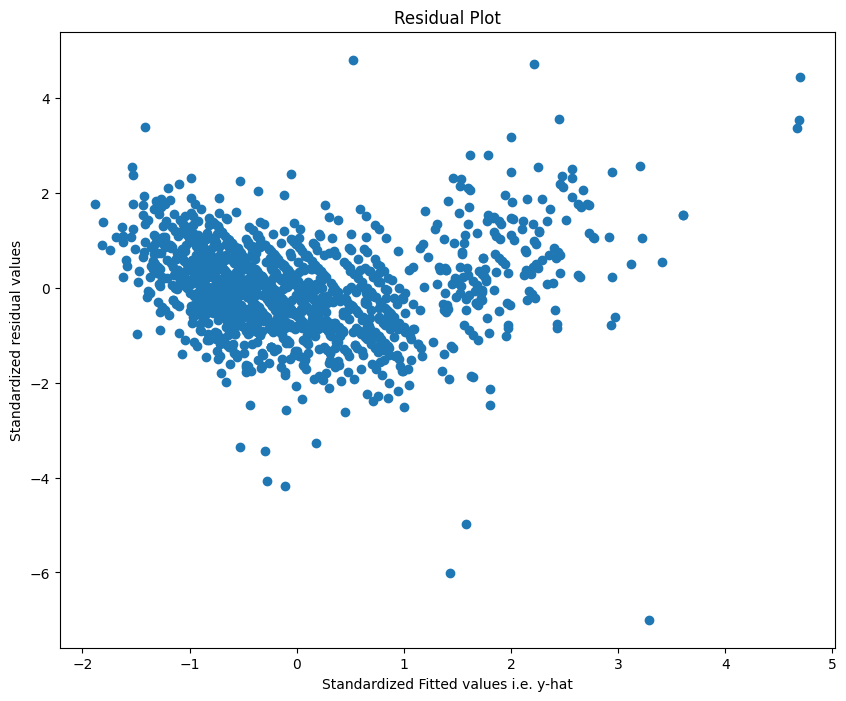

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(get_stand_values(Model.fittedvalues), # fittedvalue is y hat.,model.resid is error
            get_stand_values(Model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values i.e. y-hat')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors



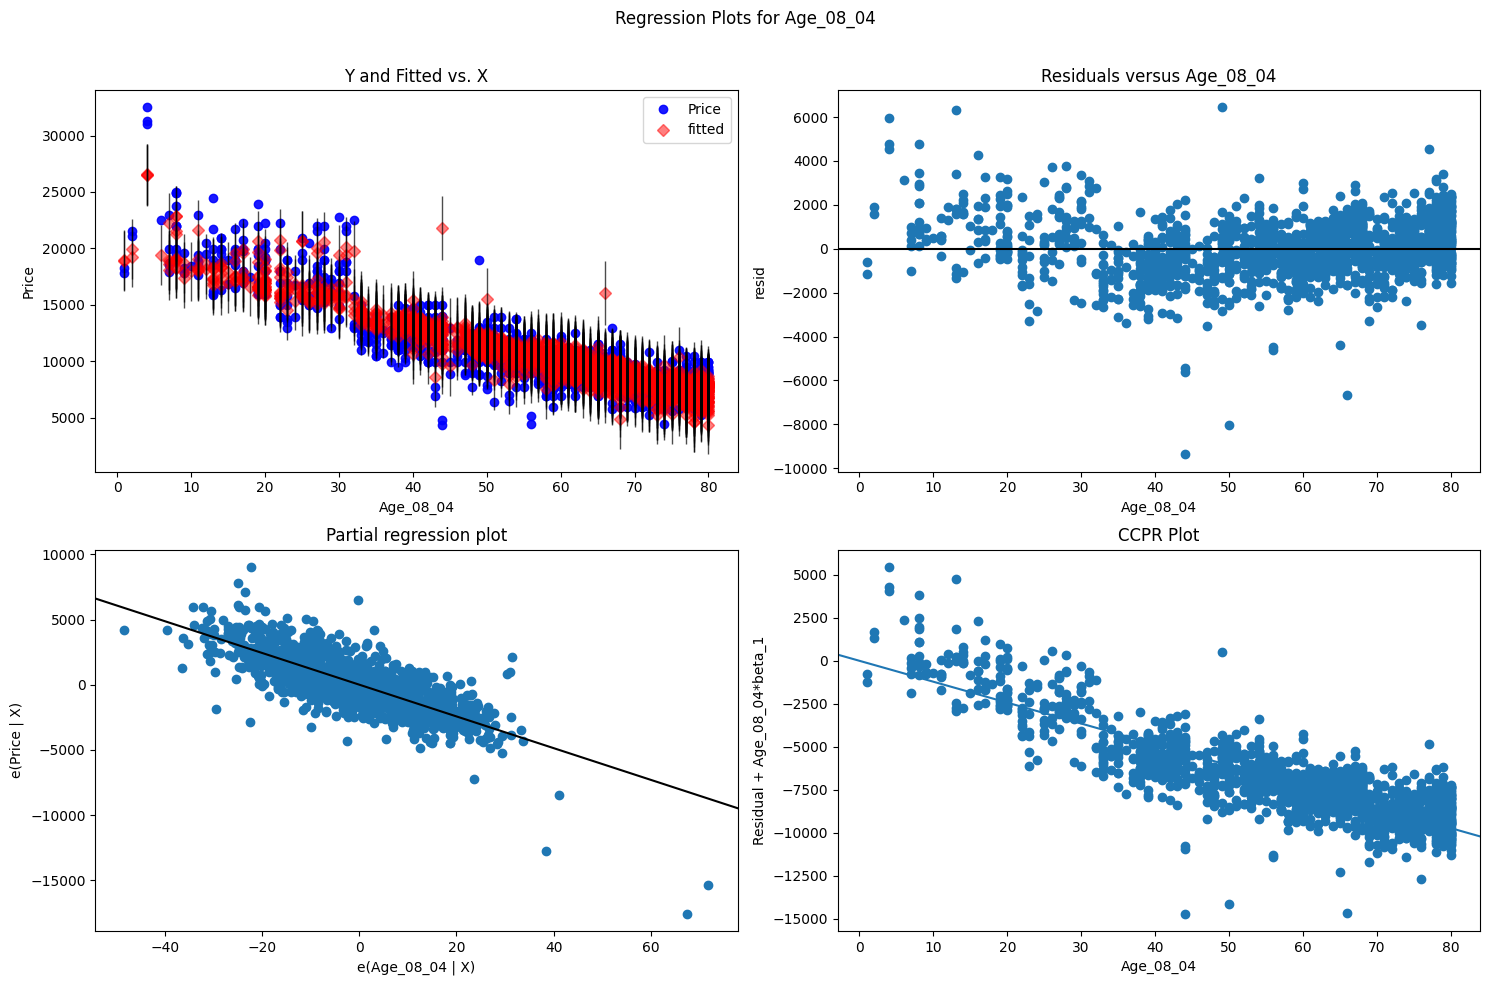

In [30]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model, "Age_08_04", fig=fig)
plt.show()

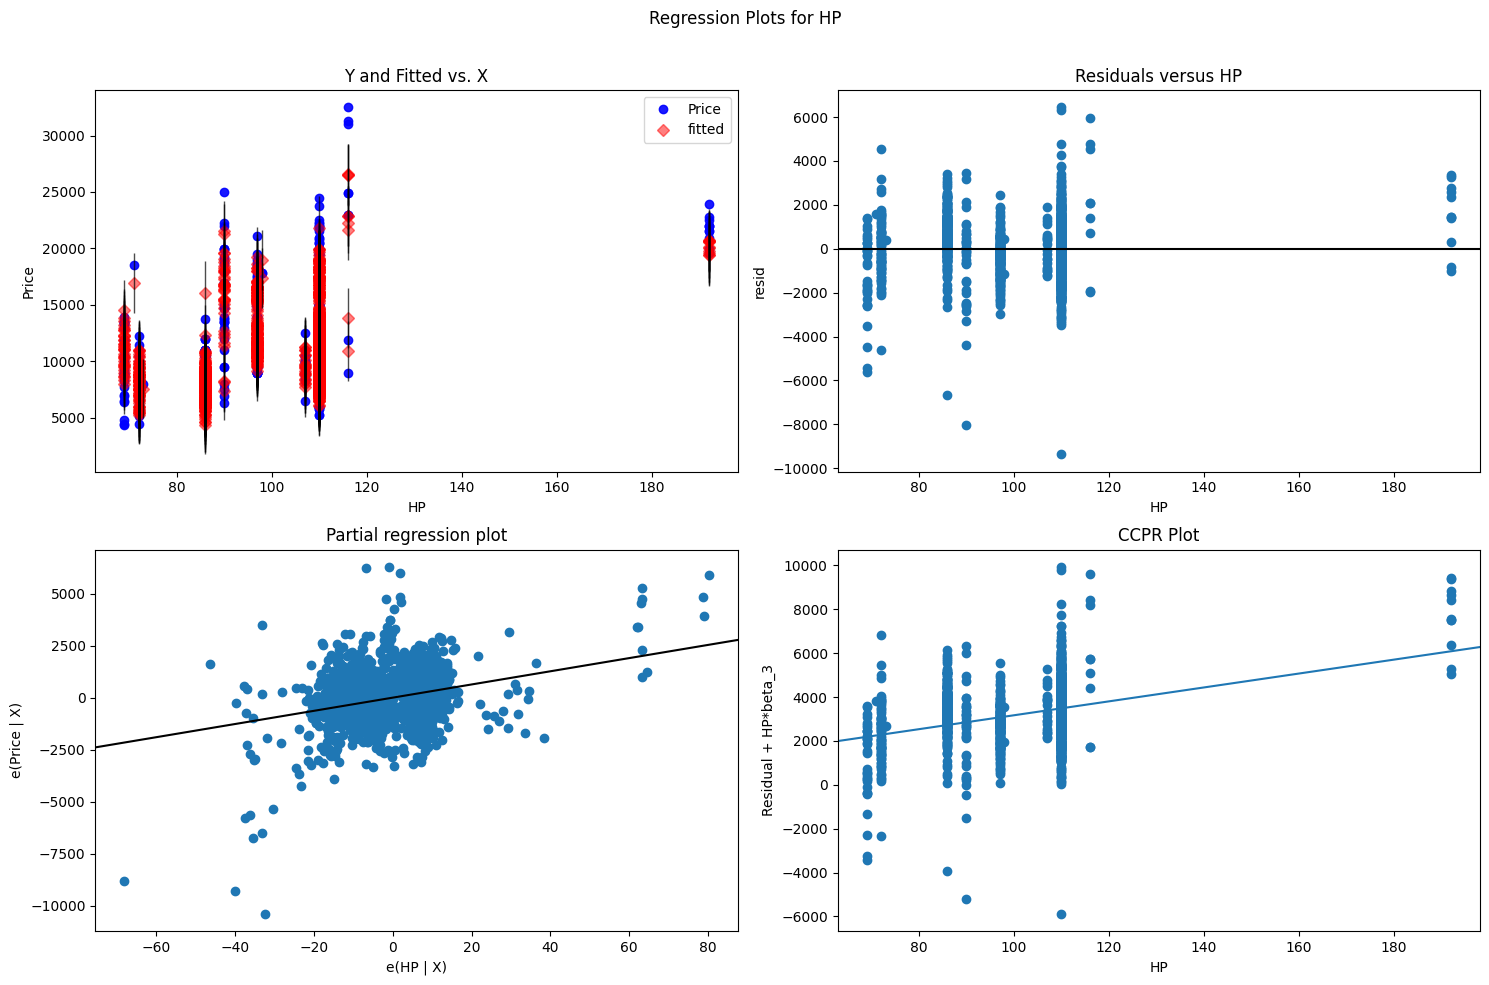

In [31]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model, "HP", fig=fig)
plt.show()

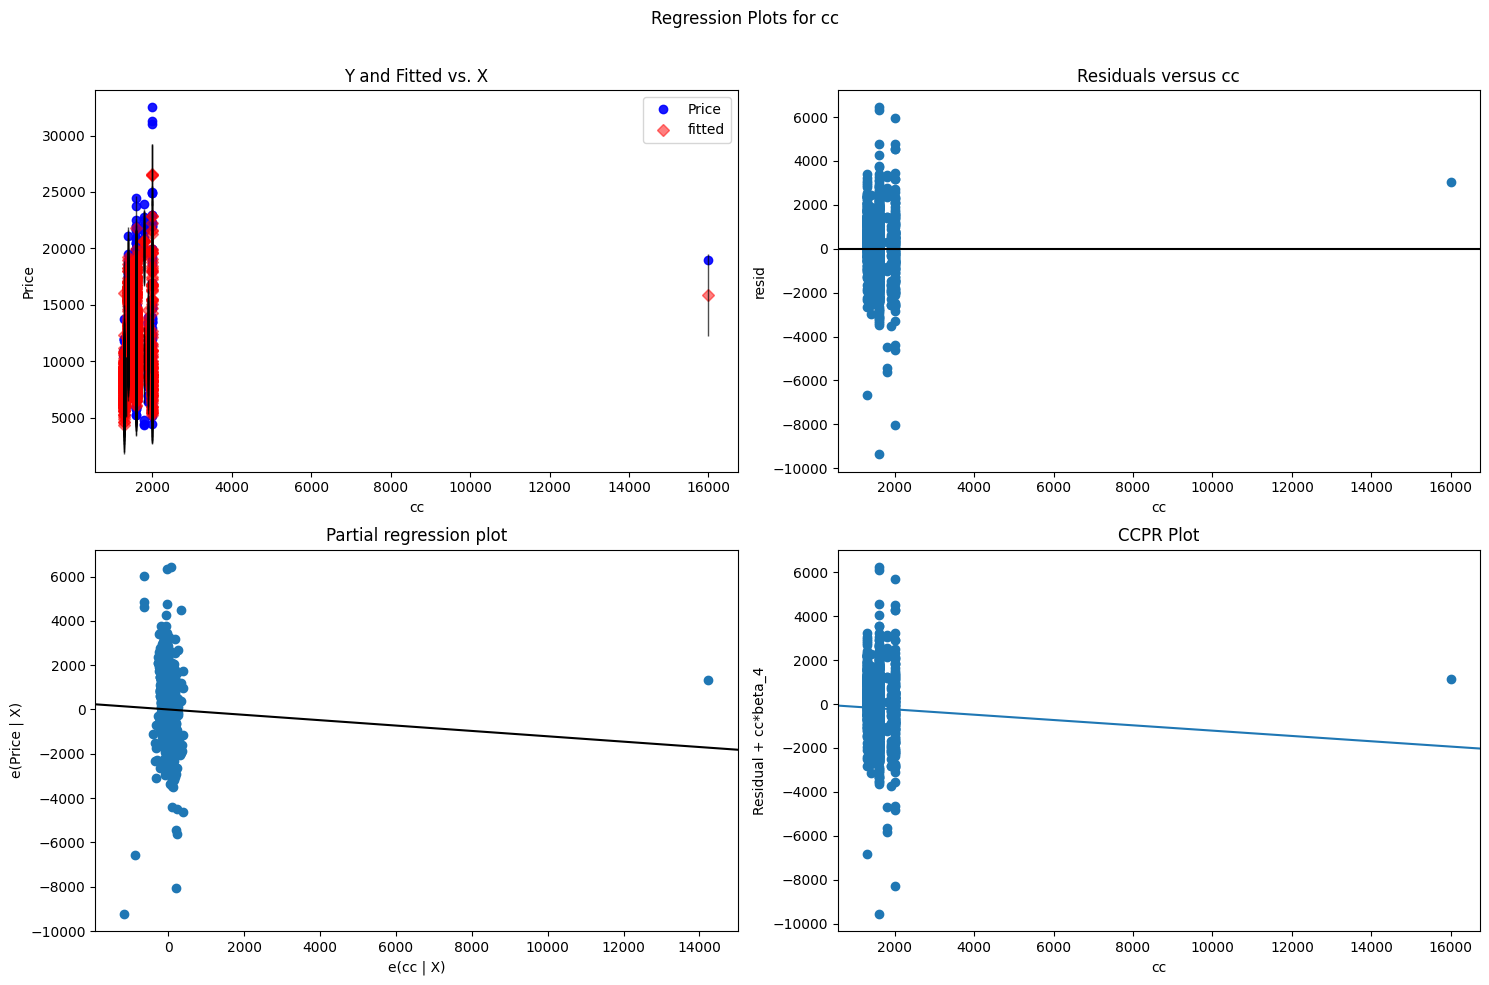

In [32]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model,"cc",fig=fig)
plt.show()

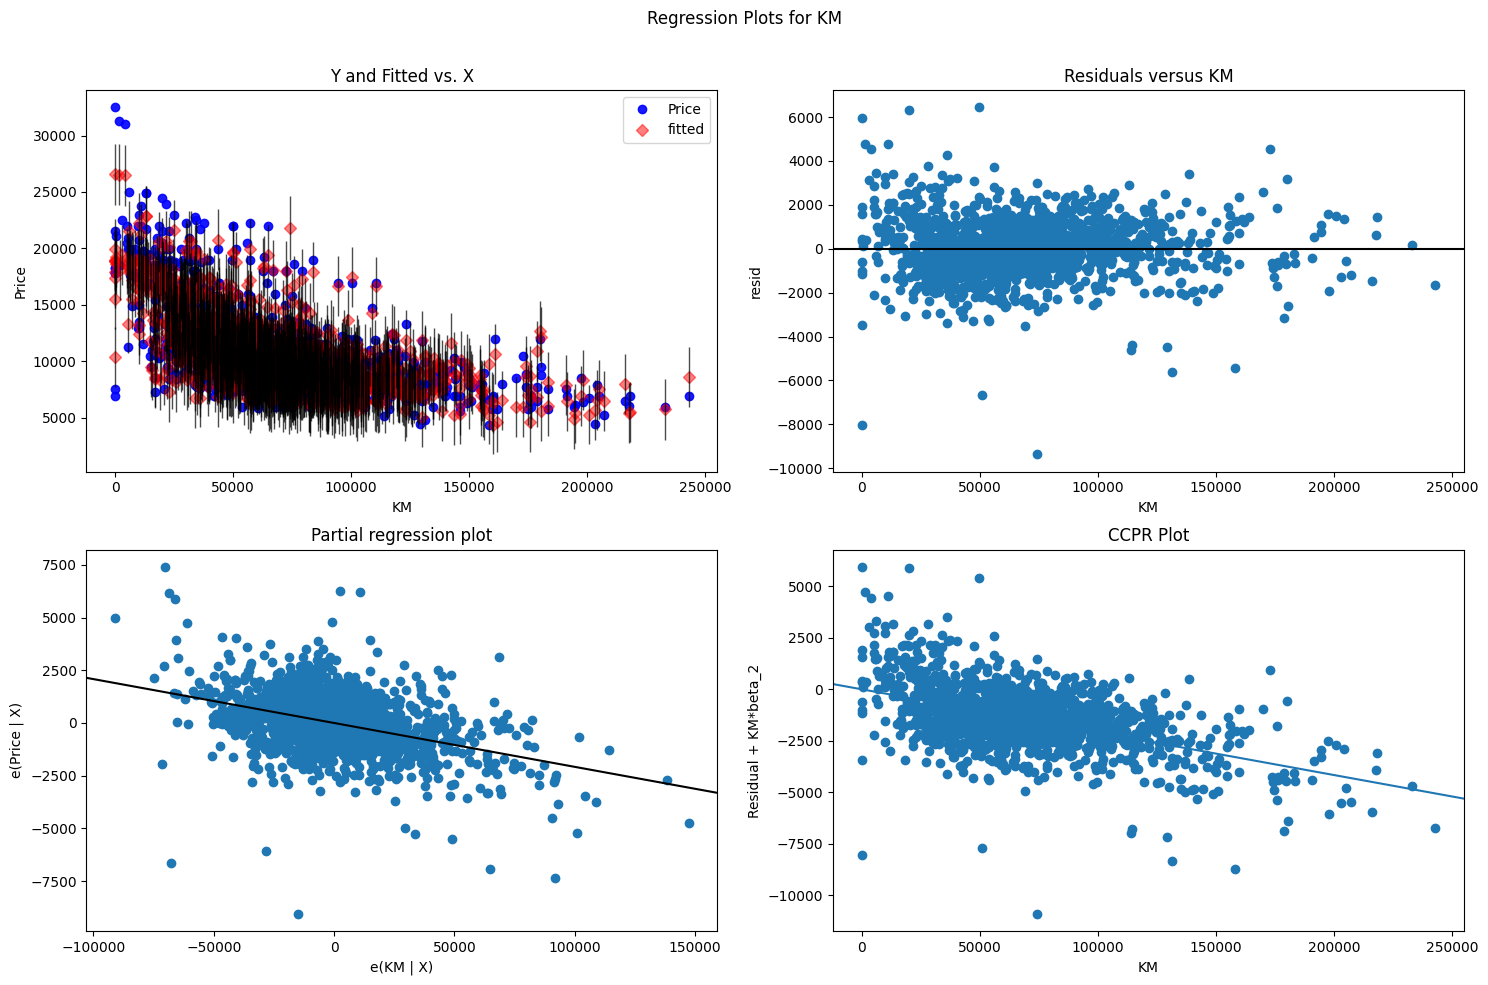

In [33]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model,"KM",fig=fig)
plt.show()

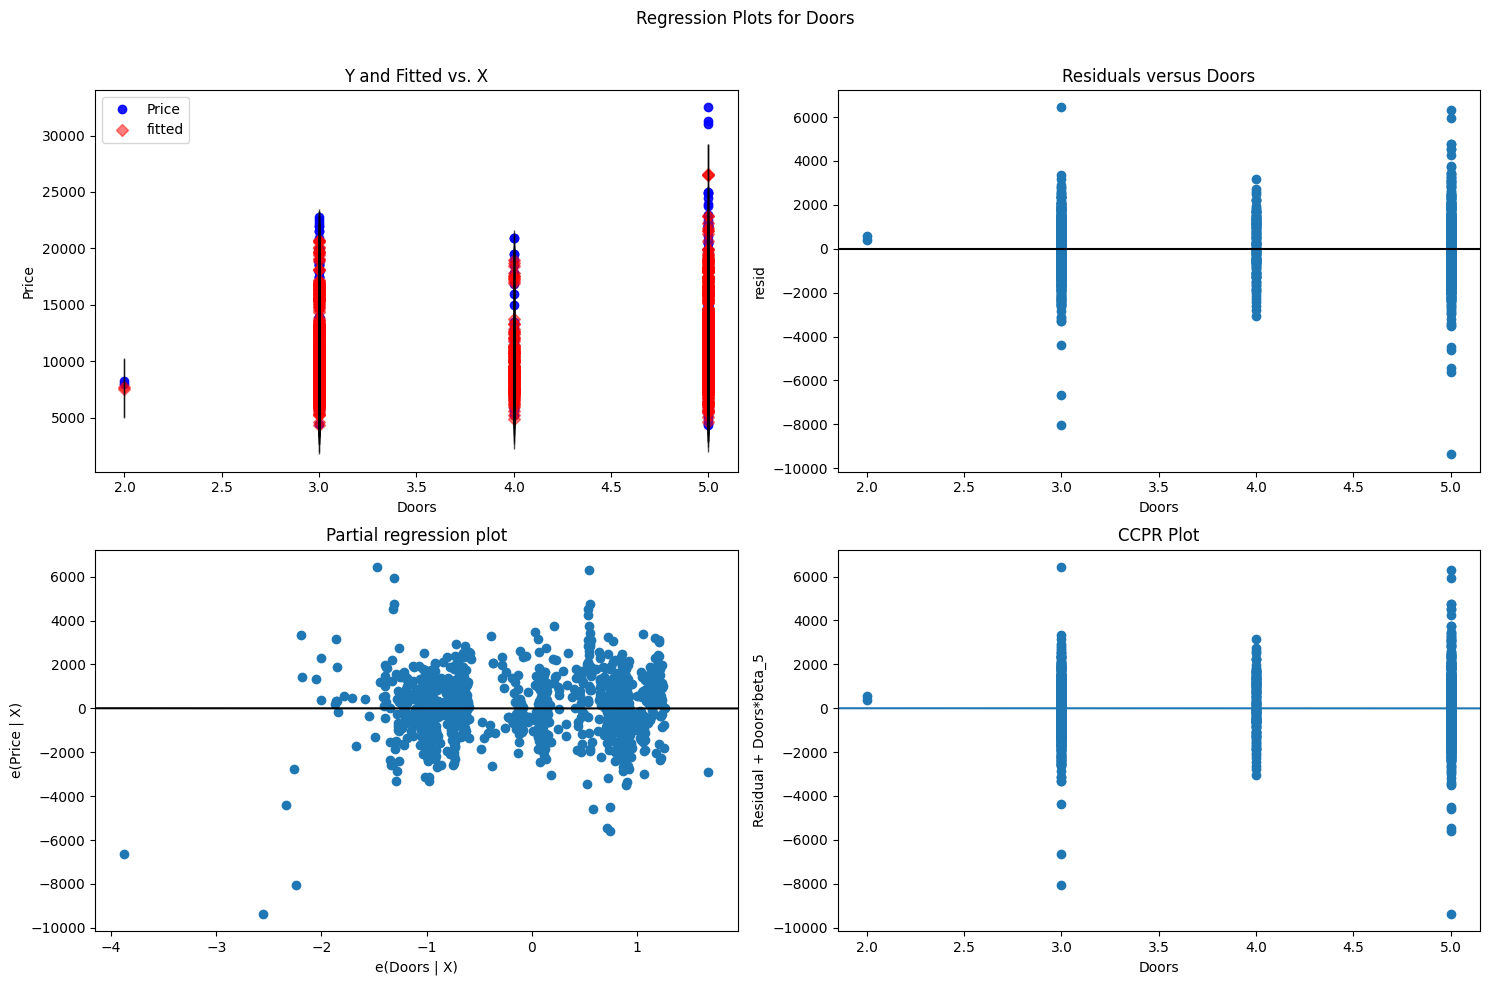

In [34]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model,"Doors",fig=fig)
plt.show()

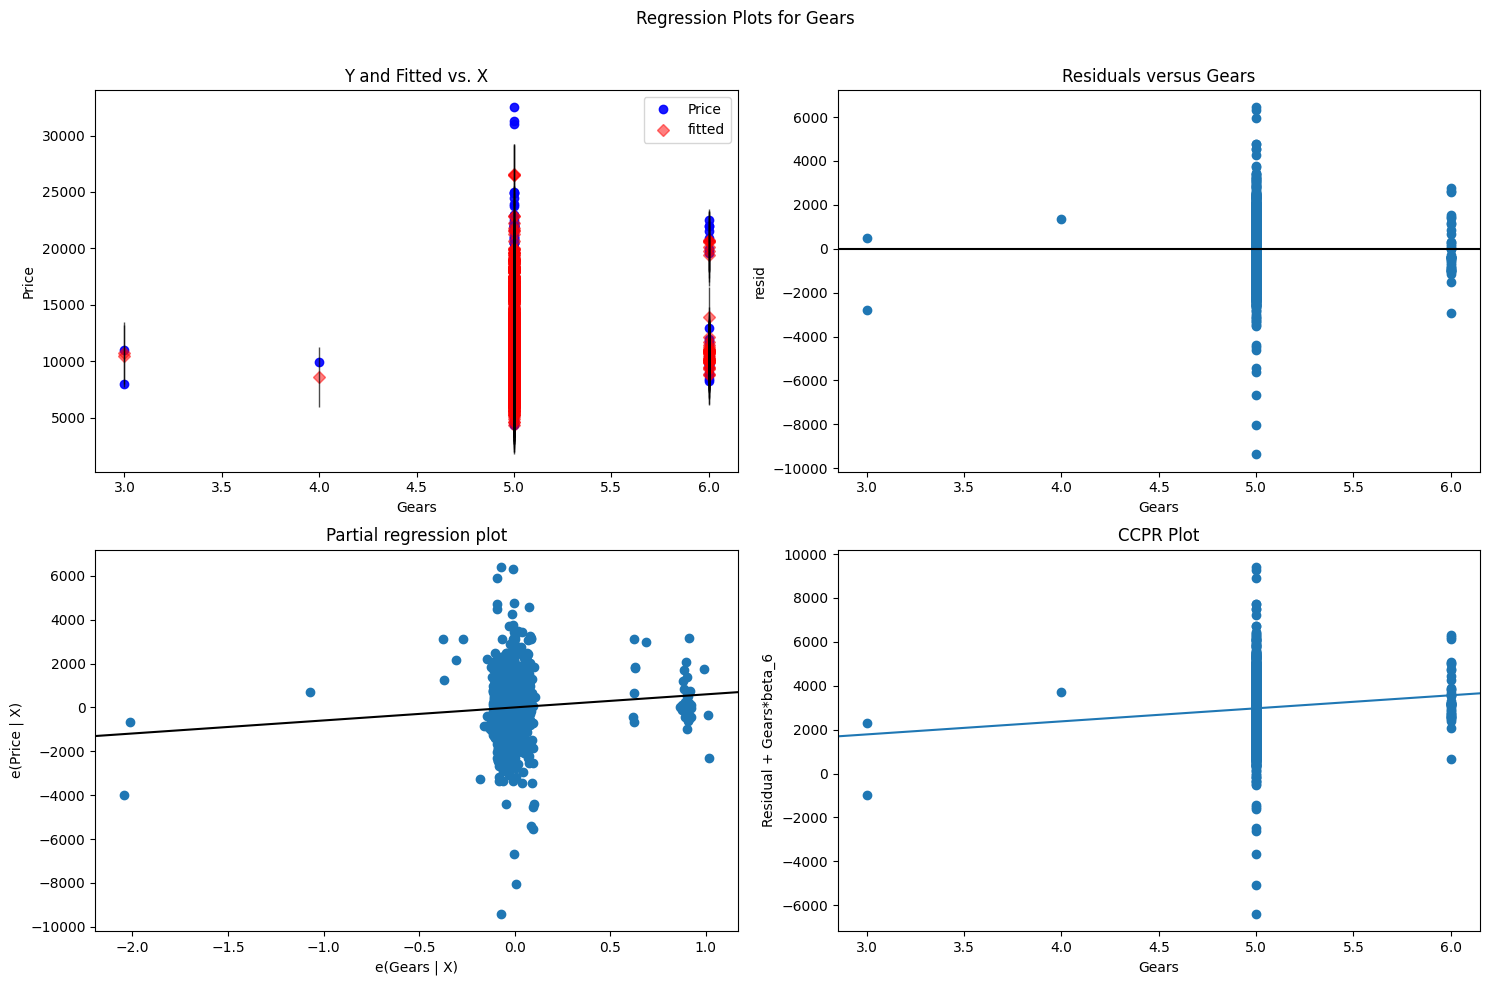

In [35]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model,"Gears",fig=fig)
plt.show()

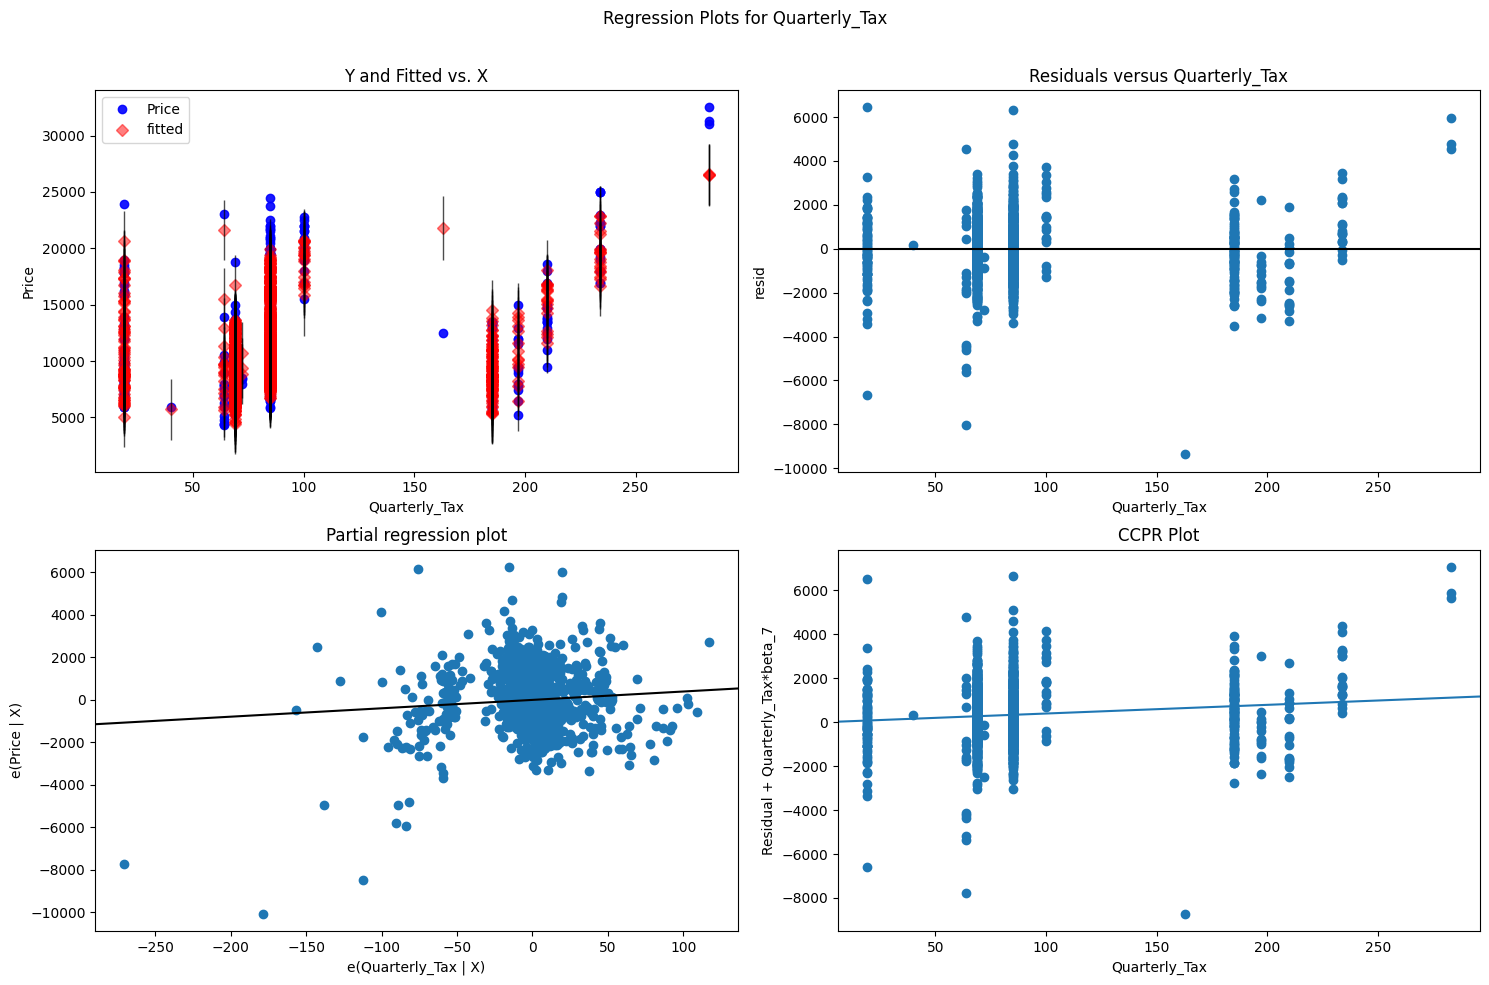

In [36]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model,"Quarterly_Tax",fig=fig)
plt.show()

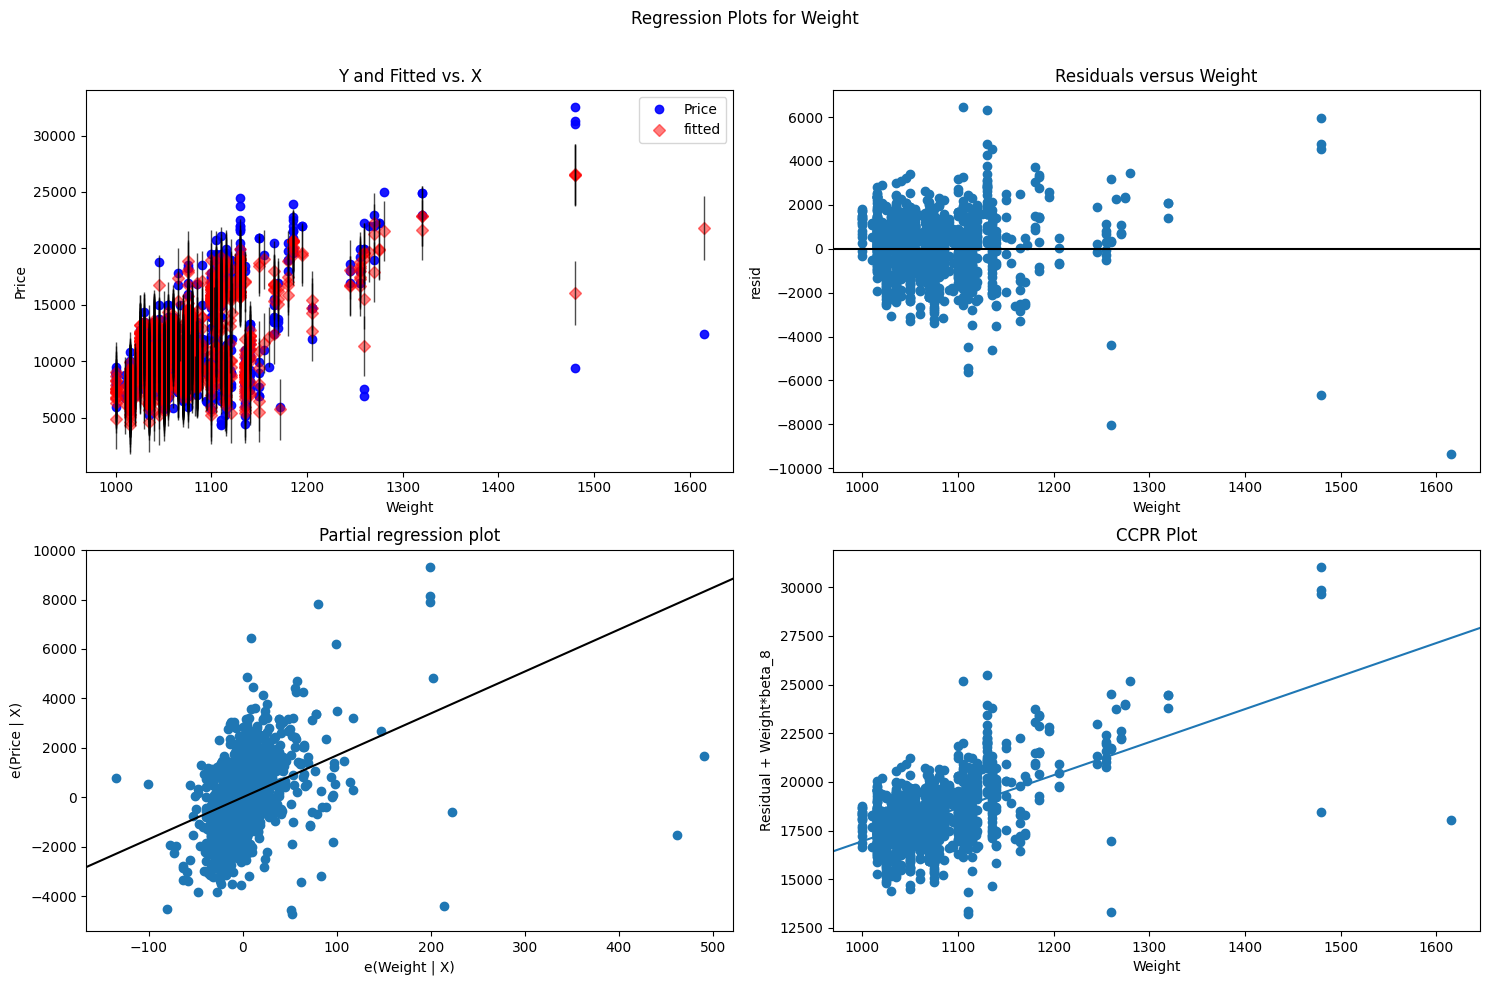

In [37]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(Model,"Weight",fig=fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook’s Distance

In [38]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = Model.get_influence() # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance # we don't need p-value so we placed _ here. That is temporary place holder.

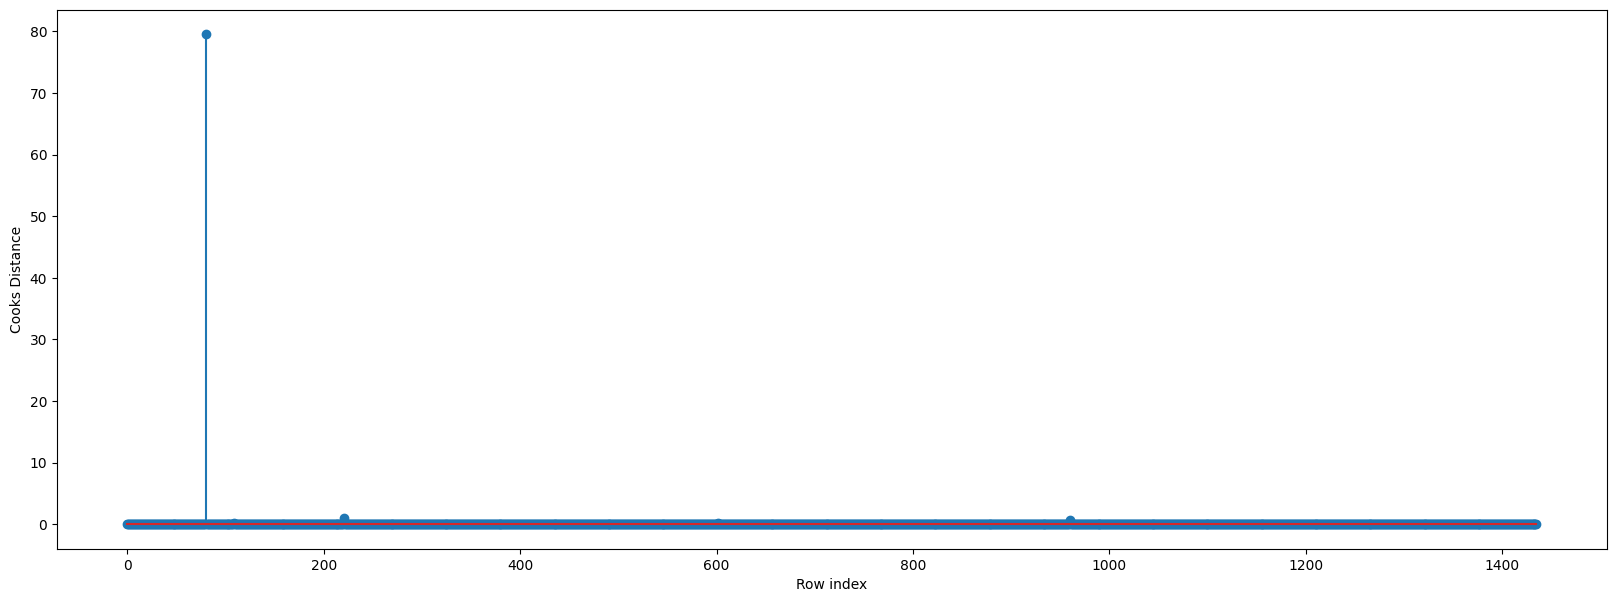

In [39]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c, 3)) # index values of car on x-axis
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show() # One points having >1 cook's distance

In [52]:
#index and value of influencer where c is more than 1.
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1.
(np.argmax(c),np.max(c)) # argmax() gives index value of max value in dataset
# 79.520 is cook's distance for index 80

(80, 79.52010624141815)

In [40]:
df2.shape

(1436, 37)

In [41]:
k = df2.shape[1] #k is no of variables as 37
n = df2.shape[0] # no of data points as 1436
leverage_cutoff = 3*((k + 1))/n
leverage_cutoff

0.07938718662952646

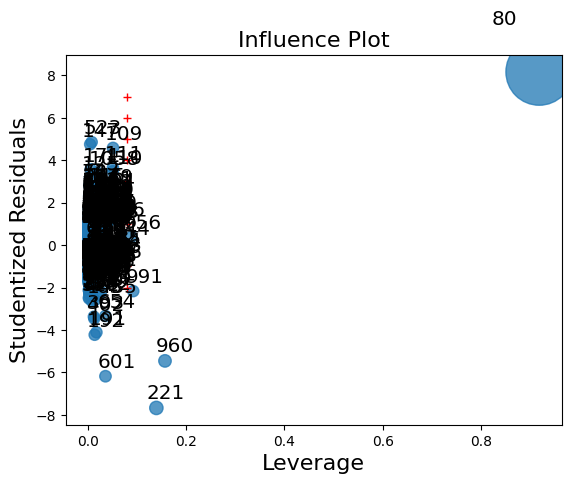

In [42]:

from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(Model,alpha=0.5)

y=[i for i in range(-2,8)]# -2 to 8: 10 values for printing + in red color
x=[leverage_cutoff for i in range(10)] # 10 values for printing + in red color
plt.plot(x,y,'r+')

plt.show()


In [43]:
df2[df2.index.isin([80,221,601])]

Model  Price  Age_08_04  Mfg_Month  \
80         TOYOTA Corolla 1.6 5drs 1 4/5-Doors  18950         25          8   
221  TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors  12450         44          1   
601   TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors   7500         50          7   

     Mfg_Year     KM Fuel_Type   HP  Met_Color  Color  ...  Central_Lock  \
80       2002  20019    Petrol  110          1   Blue  ...             1   
221      2001  74172    Petrol  110          1  Black  ...             1   
601      2000      1    Diesel   90          1  Green  ...             1   

     Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
80                 1               1      0          0            0   
221                1               1      0          0            0   
601                1               1      1          0            0   

     Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
80                  0             0               0        0  
221                 1             0               0        0  
601                 0             1               1        1  

[3 rows x 37 columns]

In [44]:
df2.head()

Model  Price  Age_08_04  \
0   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color   Color  ...  \
0         10      2002  46986    Diesel  90          1    Blue  ...   
1         10      2002  72937    Diesel  90          1  Silver  ...   
2          9      2002  41711    Diesel  90          1    Blue  ...   
3          7      2002  48000    Diesel  90          0   Black  ...   
4          3      2002  38500    Diesel  90          0   Black  ...   

   Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0             1                1               1      0          0   
1             1                0               1      0          0   
2             0                0               1      0          0   
3             0                0               1      0          0   
4             1                1               1      0          1   

   Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0            0                 1             0               0        0  
1            0                 1             0               0        0  
2            0                 1             0               0        0  
3            0                 1             0               0        0  
4            0                 1             0               0        0  

[5 rows x 37 columns]

# Improving the model

In [45]:
#Load the data
df_new = pd.read_csv("/content/ToyotaCorolla.csv",encoding='latin1')

In [46]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[80,221,106]],axis=0).reset_index()

In [47]:
df1

index    Id                                              Model  Price  \
0         0     1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1         1     2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2         2     3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3         3     4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4         4     5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...     ...   ...                                                ...    ...   
1428   1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1429   1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1430   1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1431   1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1432   1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  ...  Central_Lock  \
0            23         10      2002  46986    Diesel   90  ...             1   
1            23         10      2002  72937    Diesel   90  ...             1   
2            24          9      2002  41711    Diesel   90  ...             0   
3            26          7      2002  48000    Diesel   90  ...             0   
4            30          3      2002  38500    Diesel   90  ...             1   
...         ...        ...       ...    ...       ...  ...  ...           ...   
1428         69         12      1998  20544    Petrol   86  ...             1   
1429         72          9      1998  19000    Petrol   86  ...             0   
1430         71         10      1998  17016    Petrol   86  ...             0   
1431         70         11      1998  16916    Petrol   86  ...             0   
1432         76          5      1998      1    Petrol  110  ...             0   

     Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                  1               1      0          0            0   
1                  0               1      0          0            0   
2                  0               1      0          0            0   
3                  0               1      0          0            0   
4                  1               1      0          1            0   
...              ...             ...    ...        ...          ...   
1428               1               1      0          1            1   
1429               0               1      0          0            1   
1430               0               1      0          0            0   
1431               0               0      0          0            0   
1432               0               1      0          0            0   

      Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                    1             0               0        0  
1                    1             0               0        0  
2                    1             0               0        0  
3                    1             0               0        0  
4                    1             0               0        0  
...                ...           ...             ...      ...  
1428                 1             0               0        0  
1429                 1             0               0        0  
1430                 1             0               0        0  
1431                 1             0               0        0  
1432                 0             0               0        0  

[1433 rows x 39 columns]

In [48]:
#Drop the original index
df1=df1.drop(['index'],axis=1)


In [49]:
df1

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1428  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1429  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1430  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1431  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1432  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1428         69         12      1998  20544    Petrol   86          1  ...   
1429         72          9      1998  19000    Petrol   86          0  ...   
1430         71         10      1998  17016    Petrol   86          0  ...   
1431         70         11      1998  16916    Petrol   86          1  ...   
1432         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1428            1                1               1      0          1   
1429            0                0               1      0          0   
1430            0                0               1      0          0   
1431            0                0               0      0          0   
1432            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1428            1                 1             0               0        0  
1429            1                 1             0               0        0  
1430            0                 1             0               0        0  
1431            0                 1             0               0        0  
1432            0                 0             0               0        0  

[1433 rows x 38 columns]

In [50]:
df1[df1.duplicated]

Empty DataFrame
Columns: [Id, Model, Price, Age_08_04, Mfg_Month, Mfg_Year, KM, Fuel_Type, HP, Met_Color, Color, Automatic, cc, Doors, Cylinders, Gears, Quarterly_Tax, Weight, Mfr_Guarantee, BOVAG_Guarantee, Guarantee_Period, ABS, Airbag_1, Airbag_2, Airco, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows, Power_Steering, Radio, Mistlamps, Sport_Model, Backseat_Divider, Metallic_Rim, Radio_cassette, Tow_Bar]
Index: []

[0 rows x 38 columns]

Build the model on the new data

In [53]:
Model_P = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit()

In [68]:
Model_P.rsquared,Model_P.rsquared_adj,Model_P.aic

(0.8778219184430703, 0.8771355247264584, 24553.935593109956)

# compare with 1st model values. It was 0.8637, now it is 0.8778 and AIC value get least as compaire to previous.